### Library Imports

In [1]:
import gym
import numpy as np
import torch as th
import matplotlib.pyplot as plt

from stable_baselines3 import DQN # Deep Q Network (DQN) # https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html
from stable_baselines3 import PPO # Proximal Policy Optimization  # https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
from stable_baselines3 import DDPG  # Deep Deterministic Policy Gradient (DDPG) # https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html

from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# from stable_baselines3.common.env_util import make_vec_env

In [2]:
env = gym.make("MountainCar-v0")
# env = make_vec_env("MountainCarContinuous-v0", n_envs=1) ## for ddpg

In [ ]:
# tensorboard_log = "data/tb/" 

### PPO Model Specification

In [ ]:
ppo_model = PPO("MlpPolicy", env) # default

In [ ]:
# The learning agent and hyperparameters
ppo_model = PPO(
    policy='MlpPolicy',
    env=env,
    seed=0,
    batch_size=256,
    ent_coef=0.00429,
    learning_rate=7.77e-05,
    n_epochs=10,
    n_steps=8,
    gae_lambda=0.9,
    gamma=0.9999,
    clip_range=0.1,
    max_grad_norm =5,
    vf_coef=0.19,
    # use_sde=True, for continuous mountaincar
    policy_kwargs=dict(log_std_init=-3.29, ortho_init=False),
    verbose=1,
    #tensorboard_log=logdir
)

#### Discussion of PPO and DDPG on MountainCar:

https://www.reddit.com/r/reinforcementlearning/comments/9o8ez0/ppo_struggling_at_mountaincar_whereas_ddpg_is/

Sparse rewards. In OpenAI Gym MountainCar you only get a positive reward when you reach the top.

PPO is an on-policy algorithm. It performs a policy gradient update after each episode and throws the data away. Reaching the goal in MountainCar by random actions is a pretty rare event. When it finally happens, it's very unlikely that a single policy gradient update will be enough to start reaching the goal consistently, so PPO gets stuck again with no learning signal until it reaches the goal again by chance.

On the other hand, DDPG stores this event in the replay buffer so it does not forget. The TD bootstrapping of the Q function will eventually propagate the reward from the goal backwards into the Q estimate for other states near the goal.

This is a big advantage of off-policy RL algorithms.

Also DDPG uses an Ornstein-Uhlenbeck process for time-correlated exploration, whereas PPO samples Gaussian noise. The Ornstein-Uhlenbeck process is more likely to generate useful exploratory actions. (The exploration methods are not immutable properties of the algorithms, just the Baselines implementations.)

### DDPG Model Specification

In [ ]:
ddpg_model = DDPG("MlpPolicy",env)

### DQN Model Specification

In [ ]:
dqn_model = []
dqn_model = DQN("MlpPolicy",env)

In [3]:
dqn_model = DQN("MlpPolicy",
            env,
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=600,
            learning_starts=1000,
            buffer_size=10000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            #tensorboard_log=tensorboard_log,
            seed=2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Model Evaluations

In [5]:
# Evaluate the agent before training

mean_reward, std_reward = evaluate_policy(dqn_model, dqn_model.get_env(), deterministic=True, n_eval_episodes=20)
#mean_reward, std_reward = evaluate_policy(ppo_model, ppo_model.get_env(), deterministic=True, n_eval_episodes=20)
#mean_reward, std_reward = evaluate_policy(ddpg_model, ddpg_model.get_env(), deterministic=True, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# dqn
# mean_reward:-200.00 +/- 0.00

# ppo
# mean_reward:-200.00 +/- 0.00

# ppo, hyperparameters:
# mean_reward:-200.00 +/- 0.00

# ddpg:
# mean_reward:-0.47 +/- 0.00
# mean_reward:-0.06 +/- 0.00

mean_reward:-200.00 +/- 0.00


In [ ]:
# Optional: Monitor training in tensorboard
# %load_ext tensorboard
# %tensorboard --logdir $tensorboard_log

In [6]:
%%time

dqn_model.learn(int(1.2e5), log_interval=10)

#ppo_model.learn(int(1.2e5), log_interval=10)

#ddpg_model.learn(int(1.2e5), log_interval=10)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 1464     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 3.35e-05 |
|    n_updates        | 496      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 954      |
|    time_elapsed     | 4        |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 1.39e-06 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -198     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 170      |
|    fps              | 682      |
|    time_elapsed     | 49       |
|    total_timesteps  | 33810    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.000571 |
|    n_updates        | 16408    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -198     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 680      |
|    time_elapsed     | 52       |
|    total_timesteps  | 35759    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.000643 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -177     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 330      |
|    fps              | 661      |
|    time_elapsed     | 95       |
|    total_timesteps  | 62845    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.0562   |
|    n_updates        | 30920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 176      |
|    ep_rew_mean      | -176     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 660      |
|    time_elapsed     | 97       |
|    total_timesteps  | 64681    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.0448   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 148      |
|    ep_rew_mean      | -148     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 490      |
|    fps              | 652      |
|    time_elapsed     | 135      |
|    total_timesteps  | 88125    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.195    |
|    n_updates        | 43560    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 145      |
|    ep_rew_mean      | -145     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 651      |
|    time_elapsed     | 137      |
|    total_timesteps  | 89546    |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.276    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 121      |
|    ep_rew_mean      | -121     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 650      |
|    fps              | 645      |
|    time_elapsed     | 167      |
|    total_timesteps  | 108278   |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.143    |
|    n_updates        | 53640    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 120      |
|    ep_rew_mean      | -120     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 645      |
|    time_elapsed     | 169      |
|    total_timesteps  | 109520   |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.11     |
|    n_updates      

#### DQN:
CPU times: total: 19min 42s
Wall time: 3min 17s

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 126      |
|    ep_rew_mean      | -126     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 607      |
|    time_elapsed     | 197      |
|    total_timesteps  | 119695   |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.288    |
     n_updates 59344

CPU times: total: 19min 42s
Wall time: 3min 17s

#### DQN, discrete mountaincar

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 126      |
|    ep_rew_mean      | -126     |
|    exploration_rate | 0.07     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 641      |
|    time_elapsed     | 186      |
|    total_timesteps  | 119695   |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.288    |
|    n_updates        | 59344    |
----------------------------------
CPU times: total: 18min 42s
Wall time: 3min 7s

#### PPO, discrete mountaincar

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 200      |
|    ep_rew_mean          | -200     |
| time/                   |          |
|    fps                  | 290      |
|    iterations           | 15000    |
|    time_elapsed         | 412      |
|    total_timesteps      | 120000   |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.1      |
|    entropy_loss         | -0.0442  |
|    explained_variance   | 0        |
|    learning_rate        | 7.77e-05 |
|    loss                 | 2.42     |
|    n_updates            | 149990   |
|    policy_gradient_loss | 1.42e-08 |
|    value_loss           | 12.9     |
--------------------------------------
CPU times: total: 41min 15s
Wall time: 6min 52s
<stable_baselines3.ppo.ppo.PPO at 0x2a1f2327a90>

In [7]:
# Evaluate after training, the mean episodic reward should have improve

mean_reward, std_reward = evaluate_policy(dqn_model, dqn_model.get_env(), deterministic=True, n_eval_episodes=20)

#mean_reward, std_reward = evaluate_policy(ppo_model, ppo_model.get_env(), deterministic=True, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# mean_reward:-99.45 +/- 8.46 (using zoo hyperparmeters)

# dqn, default
# mean_reward:-200.00 +/- 0.00 # default!

# dqn, hyperparameters:
# mean_reward:-101.45 +/- 8.33

# ppo, default
# mean_reward:-200.00 +/- 0.00

# ppo, hyperparams (for mountaincar continuous)
# mean_reward:-200.00 +/- 0.00

# dqn, hyperparams (with right hyperparams for mountaincar discrete)
# mean_reward:-99.45 +/- 8.46

mean_reward:-99.45 +/- 8.46


### Notes

In [1]:
# https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=1402537b363fdf2625ac7e86fa9599fa41b2fd14&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f537461626c652d426173656c696e65732d5465616d2f726c2d636f6c61622d6e6f7465626f6f6b732f313430323533376233363366646632363235616337653836666139353939666134316232666431342f64716e5f7362332e6970796e62&logged_in=false&nwo=Stable-Baselines-Team%2Frl-colab-notebooks&path=dqn_sb3.ipynb&platform=android&repository_id=218974584&repository_type=Repository&version=98

# https://reneelin2019.medium.com/use-stable-baselines3-to-solve-mountain-car-continuous-in-gym-3216912cd5e3

# --

# https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=1402537b363fdf2625ac7e86fa9599fa41b2fd14&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f537461626c652d426173656c696e65732d5465616d2f726c2d636f6c61622d6e6f7465626f6f6b732f313430323533376233363366646632363235616337653836666139353939666134316232666431342f64716e5f7362332e6970796e62&logged_in=false&nwo=Stable-Baselines-Team%2Frl-colab-notebooks&path=dqn_sb3.ipynb&platform=android&repository_id=218974584&repository_type=Repository&version=98

# https://reneelin2019.medium.com/use-stable-baselines3-to-solve-mountain-car-continuous-in-gym-3216912cd5e3

#  PPO mountaincar link
# https://reneelin2019.medium.com/use-stable-baselines3-to-solve-mountain-car-continuous-in-gym-3216912cd5e3

# PPO hyperparameters:
# https://medium.com/aureliantactics/ppo-hyperparameters-and-ranges-6fc2d29bccbe

# Mountaincar Continuous
# https://www.gymlibrary.ml/environments/classic_control/mountain_car_continuous/

### Video recording

In [8]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [9]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay

def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [10]:
# "We will record a video using the VecVideoRecorder wrapper, you will learn about those wrapper in the next notebook.""


In [11]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=False)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

In [12]:
record_video('MountainCar-v0', dqn_model, video_length=500, prefix='dqn-mountaincar')

# record_video('MountainCar-v0', ppo_model, video_length=500, prefix='ppo-mountaincar')

#record_video('MountainCar-v0', ddpg_model, video_length=500, prefix='ddpg-mountaincar')

C:\ProgramData\Anaconda2021_05\envs\rl_stablebaselines3_1\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


Saving video to C:\Users\m85302\Desktop\2_py_sb3_2algoViz\videos\dqn-mountaincar-step-0-to-step-500.mp4


In [15]:
#show_videos('videos', prefix='dqn')
#show_videos('videos', prefix='ppo')

In [50]:
#%matplotlib notebook

In [51]:
# https://stackoverflow.com/questions/18019477/how-can-i-play-a-local-video-in-my-ipython-notebook
#from IPython.display import Video
#Video('./videos/1_dqn-mountaincar-step-0-to-step-500.mp4', embed=True)

In [52]:
#from IPython.display import HTML

#HTML("""
#    <video alt="test" controls>
#        <source src="./videos/1_dqn-mountaincar-step-0-to-step-500.mp4" type="video/mp4">
#    </video>
#""")

### Viz algo scores

In [29]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# scale each score by 300 for viz purposes:

df_algos = pd.DataFrame({'Algo': ['DQN', 'PPO'],
                         'Training Time [S]': [((3*60)+7), ((6*60)+52)],
                         'Score_Orig': [-99.45, -200]
                        })

df_algos['Score'] = df_algos['Score_Orig'] + 300

df_algos

,Algo,Training Time [S],Score_Orig,Score
0,DQN,187,-99.45,200.55
1,PPO,412,-200.00,100.00


In [31]:
# https://www.statology.org/seaborn-barplot-show-values/

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height()) # '{:.1f}' #2f # {:.2f}
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5) # 0.5
                #_y = p.get_y() + p.get_height() - (p.get_height()*0.75)
                value = '{:.3f}'.format(p.get_width())  # '{:.1f}' # 2f # '{:.3f}'
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

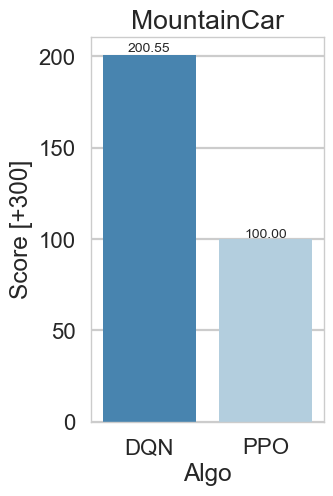

In [42]:
#plt.figure(figsize=(7,10))
plt.figure(figsize=(3,5))
#plt.figure(figsize=(5,7))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

#sns.barplot(y='Game', x='Sales', data=df.head(50),  palette="Blues_d");
p = sns.barplot(x='Algo', y='Score', data=df_algos,  palette="Blues_r");
plt.title('MountainCar')
plt.ylabel('Score [+300]')

show_values(p)
#show_values(p, "h", space=0)
#show_values(p, "h", space=0.2)